In [1]:
# Quick attempt at german credit dataset.
# Imports
import numpy as np
import pandas as pd
import scorecardpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('germancredit.csv')

In [3]:
df.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [4]:
df.info()
# 8 Numerical Columns
# 13 Categorical Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Default            1000 non-null int64
checkingstatus1    1000 non-null object
duration           1000 non-null int64
history            1000 non-null object
purpose            1000 non-null object
amount             1000 non-null int64
savings            1000 non-null object
employ             1000 non-null object
installment        1000 non-null int64
status             1000 non-null object
others             1000 non-null object
residence          1000 non-null int64
property           1000 non-null object
age                1000 non-null int64
otherplans         1000 non-null object
housing            1000 non-null object
cards              1000 non-null int64
job                1000 non-null object
liable             1000 non-null int64
tele               1000 non-null object
foreign            1000 non-null object
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [5]:
df.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
sns.set_style('darkgrid')
total = float(len(df))
def with_hue(plot, feature, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    category_labels = feature.unique()
    Number_of_categories = len(category_labels)
    k = 0
    for i in category_labels:
        total = feature.value_counts()[i]
        for j in range(hue_categories):
            percentage = 100 * a[(j*Number_of_categories + k)] / total
            x = patch[(j*Number_of_categories + k)].get_x() + patch[(j*Number_of_categories + k)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + k)].get_y() + patch[(j*Number_of_categories + k)].get_height() 
            ax.text(
                (patch[(j*Number_of_categories + k)].get_x() 
                 + patch[(j*Number_of_categories + k)].get_width()),
                patch[(j*Number_of_categories + k)].get_height() + 3,
                '{:.1f}%'.format(percentage),
                ha='right'
            )
        k += 1
    plt.show()

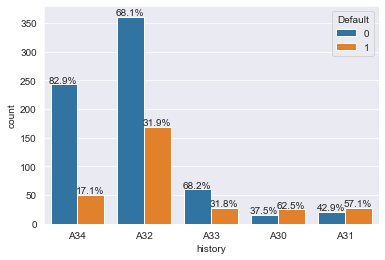

In [7]:
ax = sns.countplot(x="history", hue="Default", data=df) 
with_hue(ax, df.history, 2)
# Split changes quite a bit depending on the category
# Indicates this could be a signifcant variable

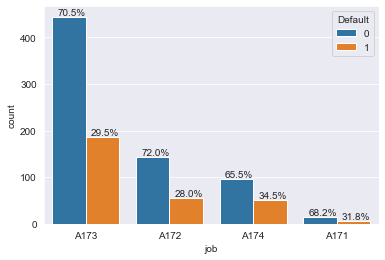

In [8]:
ax = sns.countplot(x='job', hue='Default', data=df)
with_hue(ax, df.job, 2)
# Split stays relatively the same across all categories
# Indicates that this might be an insignifcant variable

In [9]:
bins = sc.woebin(df, 'Default')

[INFO] creating woe binning ...
Binning on 1000 rows and 21 columns in 00:00:11


In [10]:
for k, bin_ in bins.items():
    print(k)
    print(bin_[['woe', 'bin_iv','total_iv']])
    
# total iv for history: 0.29183
# total iv for job: 0.008484
# Further backs up the observations from the plots above

property
        woe    bin_iv  total_iv
0 -0.461035  0.054007  0.112638
1  0.028573  0.000190  0.112638
2  0.034191  0.000391  0.112638
3  0.586082  0.058050  0.112638
history
        woe    bin_iv  total_iv
0 -0.733741  0.132423   0.29183
1  0.085158  0.000649   0.29183
2  0.088319  0.004206   0.29183
3  1.234071  0.154553   0.29183
foreign
   woe  bin_iv  total_iv
0  0.0     0.0       0.0
liable
        woe    bin_iv  total_iv
0  0.002816  0.000007  0.000043
1 -0.015409  0.000037  0.000043
residence
        woe        bin_iv  total_iv
0 -0.112478  1.606828e-03  0.003589
1  0.070151  1.536634e-03  0.003589
2 -0.054941  4.447614e-04  0.003589
3  0.001153  5.489228e-07  0.003589
cards
        woe    bin_iv  total_iv
0  0.074877  0.003601  0.010084
1 -0.134781  0.006482  0.010084
others
        woe    bin_iv  total_iv
0 -0.587787  0.015674   0.01642
1  0.027974  0.000746   0.01642
status
        woe    bin_iv  total_iv
0 -0.161641  0.016164  0.044615
1  0.235341  0.017931  0.044615
2  0

In [11]:
# split into train and test set
train, test = sc.split_df(df, 'Default').values()

In [12]:
# Convert values into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [13]:
y_train = train_woe.loc[:,'Default']
X_train = train_woe.loc[:,train_woe.columns != 'Default']
y_test = test_woe.loc[:,'Default']
X_test = test_woe.loc[:,train_woe.columns != 'Default']

In [14]:
# Fit logit model
lr = sm.Logit(y_train, X_train)
fit = lr.fit(method='bfgs', maxiter=10000)

Optimization terminated successfully.
         Current function value: 0.511501
         Iterations: 168
         Function evaluations: 169
         Gradient evaluations: 169


C:\Users\Alexander\Miniconda3\envs\main\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [15]:
fit.summary()

C:\Users\Alexander\Miniconda3\envs\main\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Alexander\Miniconda3\envs\main\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Alexander\Miniconda3\envs\main\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      681
Method:                           MLE   Df Model:                           18
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.1627
Time:                        11:38:55   Log-Likelihood:                -358.05
converged:                       True   LL-Null:                       -427.61
Covariance Type:            nonrobust   LLR p-value:                 9.510e-21
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
property_woe            0.3682        nan        nan        nan         nan         nan
liable_woe            -15.9091        nan        nan        nan         nan         nan
residence_woe           2.7269        nan        nan        nan         nan         nan
others_woe              1.5023        nan        nan        nan         nan         nan
installment_woe         2.5136        nan        nan        nan         nan         nan
tele_woe                2.9068        nan        nan        nan         nan         nan
checkingstatus1_woe     0.7751        nan        nan        nan         nan         nan
otherplans_woe          1.0345        nan        nan        nan         nan         nan
age_woe                 0.7533        nan        nan        nan         nan         nan
purpose_woe             0.9677        nan        nan        nan         nan         nan
employ_woe              0.2038        nan        nan        nan         nan         nan
history_woe             0.6540        nan        nan        nan         nan         nan
foreign_woe                  0        nan        nan        nan         nan         nan
cards_woe              -0.3039        nan        nan        nan         nan         nan
status_woe              1.2773        nan        nan        nan         nan         nan
housing_woe             0.5133        nan        nan        nan         nan         nan
amount_woe              1.0621        nan        nan        nan         nan         nan
savings_woe             0.6397        nan        nan        nan         nan         nan
duration_woe            0.6033        nan        nan        nan         nan         nan
job_woe                 0.5413        nan        nan        nan         nan         nan
=======================================================================================
"""

In [16]:
# Get probabilities
train_pred = lr.predict(fit.params, X_train)
test_pred = lr.predict(fit.params, X_test)

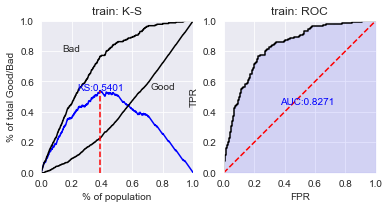

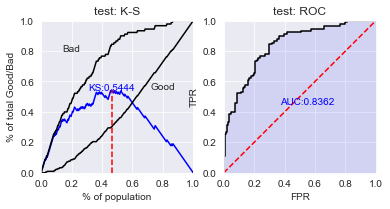

In [17]:
# Plot diagnositcs
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [18]:
# Try a subset of iv values > 0.1
for k, bin_ in bins.items():
    if bin_.total_iv[0] > 0.1:
        print(k)

property
history
checkingstatus1
age
amount
savings
duration
purpose


In [19]:
# 8 cols vs 20
cols = [
    'Default', 'property', 'age', 'amount', 'purpose', 'checkingstatus1', 
    'history', 'duration', 'savings'
]

df_new = df[cols]

In [20]:
# split into train and test set
train_new, test_new = sc.split_df(df_new, 'Default').values()
# Convert values into woe
train_woe_new = sc.woebin_ply(train_new, bins)
test_woe_new = sc.woebin_ply(test_new, bins)
y_train_new = train_woe_new.loc[:,'Default']
X_train_new = train_woe_new.loc[:,train_woe_new.columns != 'Default']
y_test_new = test_woe_new.loc[:,'Default']
X_test_new = test_woe_new.loc[:,test_woe_new.columns != 'Default']
# Fit logit model
lr_new = sm.Logit(y_train_new, X_train_new)
fit_new = lr_new.fit(method='bfgs', maxiter=10000)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
Optimization terminated successfully.
         Current function value: 0.541019
         Iterations: 39
         Function evaluations: 40
         Gradient evaluations: 40


In [21]:
fit_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            7
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.1143
Time:                        11:38:59   Log-Likelihood:                -378.71
converged:                       True   LL-Null:                       -427.61
Covariance Type:            nonrobust   LLR p-value:                 3.094e-18
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
property_woe            0.5914      0.279      2.117      0.034       0.044       1.139
age_woe                 0.8867      0.251      3.538      0.000       0.396       1.378
history_woe             0.6963      0.171      4.062      0.000       0.360       1.032
amount_woe              0.7583      0.236      3.212      0.001       0.296       1.221
savings_woe             0.5553      0.202      2.756      0.006       0.160       0.950
duration_woe            0.6724      0.186      3.612      0.000       0.308       1.037
purpose_woe             1.0065      0.224      4.492      0.000       0.567       1.446
checkingstatus1_woe     0.7206      0.108      6.662      0.000       0.509       0.933
=======================================================================================
"""

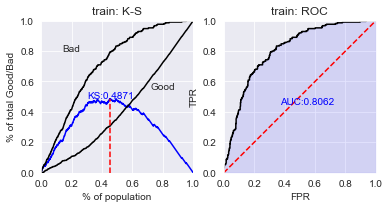

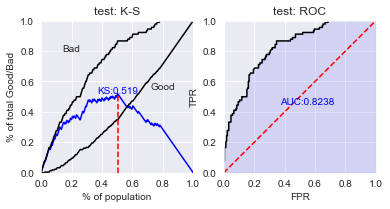

In [22]:
# Get probabilities
train_pred_new = lr_new.predict(fit_new.params, X_train_new)
test_pred_new = lr_new.predict(fit_new.params, X_test_new)
# Plot diagnositcs
train_perf_new = sc.perf_eva(y_train_new, train_pred_new, title = "train")
test_perf_new = sc.perf_eva(y_test_new, test_pred_new, title = "test")

In [23]:
# AUC and K-S is lower in the smaller model but only slightly.
# Going to calculate AIC 
# Get log-likelihood of each

log_ = lr.loglike(fit.params)
log_new = lr_new.loglike(fit_new.params)

AIC = -2*log_ + 2*20
AIC_new = -2*log_new + 2*8

In [24]:
print("AIC: " + str(AIC))
print("AIC_new: " + str(AIC_new))

AIC: 756.1013107562072
AIC_new: 773.4268394634463


In [25]:
# AIC for the full model is still lower which suggests to go with the full
# over the subset taken.